***NAME: SADDAM HUSSAIN***

***REG ID: GO_STP_6834***

---



---



# We have a dataset that contains multiple user's information through the social network who are interested in buying SUV Car or not.

In [ ]:
pip install pyforest

In [ ]:
import pyforest

import warnings
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv('/content/User_Data.csv')
df.head()

<IPython.core.display.Javascript object>

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.shape

(400, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df['User ID'].nunique()

400

In [ ]:
del df['User ID']

In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
df['Purchased'].value_counts(normalize = True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

<IPython.core.display.Javascript object>

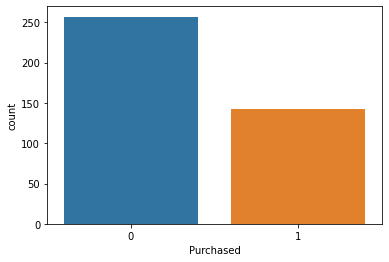

In [ ]:
sns.countplot(df['Purchased'])

# Data Visualization

<IPython.core.display.Javascript object>

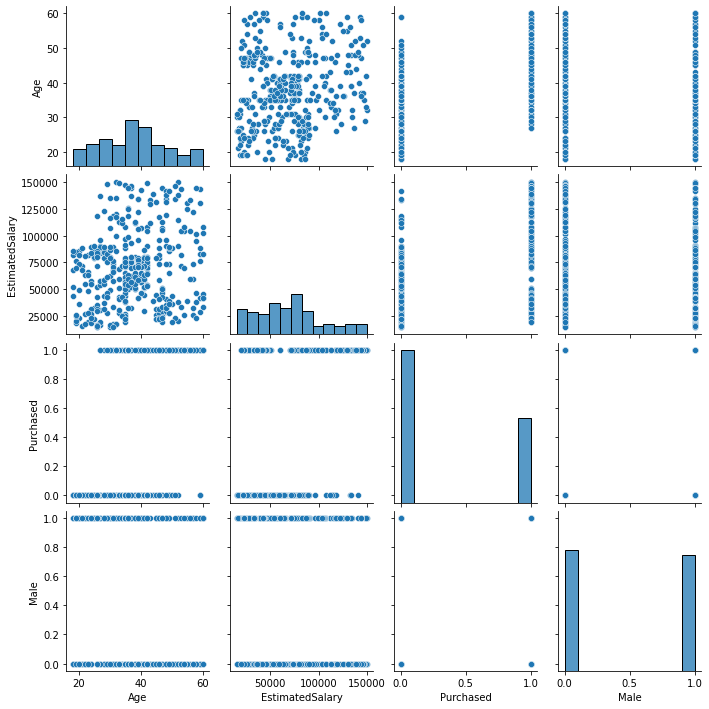

In [ ]:
sns.pairplot(df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

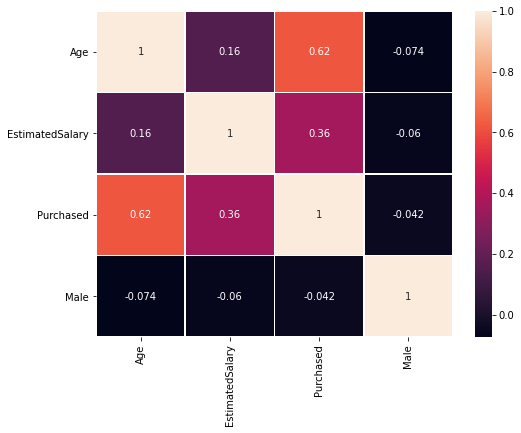

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, linewidths=0.8)
plt.xticks(rotation = 90)
plt.show()

<IPython.core.display.Javascript object>

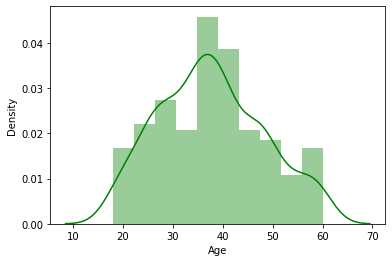

In [ ]:
sns.distplot(df['Age'], color = 'green')

<IPython.core.display.Javascript object>

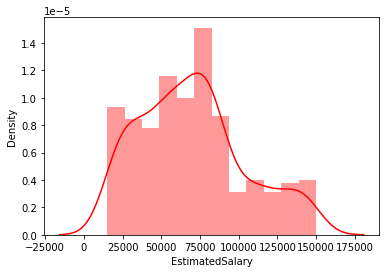

In [ ]:
sns.distplot(df['EstimatedSalary'], color = 'red')

<IPython.core.display.Javascript object>

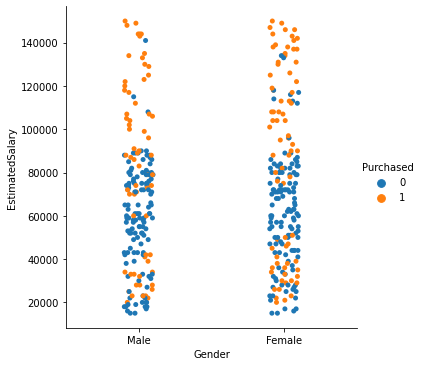

In [ ]:
sns.catplot(x= 'Gender', y = 'EstimatedSalary', hue = 'Purchased',data = df)

<IPython.core.display.Javascript object>

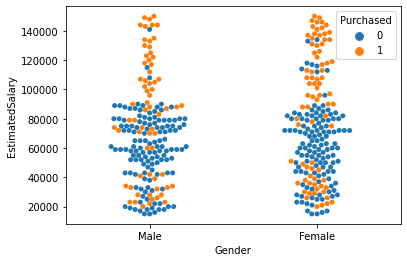

In [ ]:
sns.swarmplot(x= 'Gender', y = 'EstimatedSalary', hue = 'Purchased',data = df)

<IPython.core.display.Javascript object>

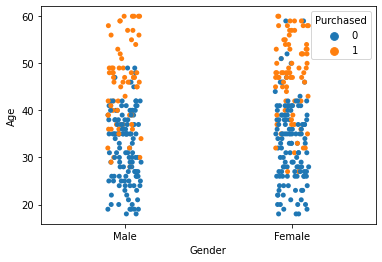

In [ ]:
sns.stripplot(x = 'Gender', y = 'Age',hue = 'Purchased', data = df)

<IPython.core.display.Javascript object>

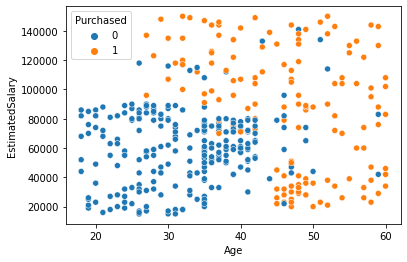

In [ ]:
sns.scatterplot(x = 'Age', y = 'EstimatedSalary',hue = 'Purchased', data = df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

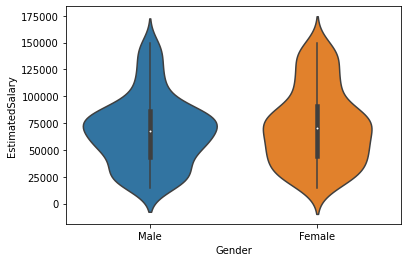

In [ ]:
sns.violinplot(x = 'Gender', y = 'EstimatedSalary', data = df)
plt.show()

<IPython.core.display.Javascript object>

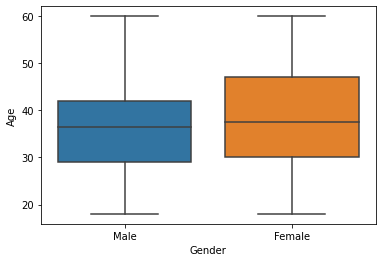

In [ ]:
sns.boxplot(x = 'Gender', y = 'Age', data = df)

<IPython.core.display.Javascript object>

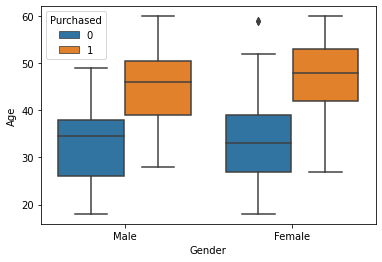

In [ ]:
sns.boxplot(x = 'Gender', y = 'Age', hue = 'Purchased', data = df)

# Encoding

In [ ]:
Gender_Encoding = pd.get_dummies(df['Gender'], drop_first = True)

df = df.join(Gender_Encoding)
df.drop('Gender', axis = 1, inplace = True)

<IPython.core.display.Javascript object>

In [ ]:
df

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


There is a class Imbalance

<IPython.core.display.Javascript object>

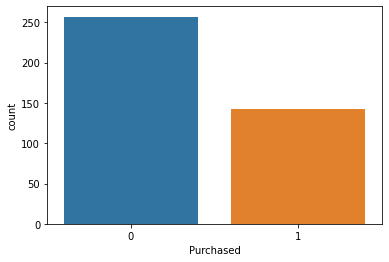

In [ ]:
sns.countplot(df['Purchased'])

In [ ]:
X = df.drop('Purchased', axis = 1)
y = df['Purchased']

print(X.count())
print(y.count())

Age                400
EstimatedSalary    400
Male               400
dtype: int64
400


<IPython.core.display.Javascript object>

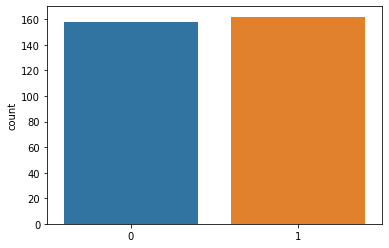

In [ ]:
from imblearn.combine import SMOTEENN
sme = SMOTEENN(random_state = 42)
X1, y1 = sme.fit_resample(X, y)
sns.countplot(y1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, y_pred)
cm

print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.9375
